loading annotations into memory...
Done (t=0.52s)
creating index...
index created!
data_sequence: (4096, 5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Max value of data_sequence: 1.0
Min value of data_sequence: 0.0


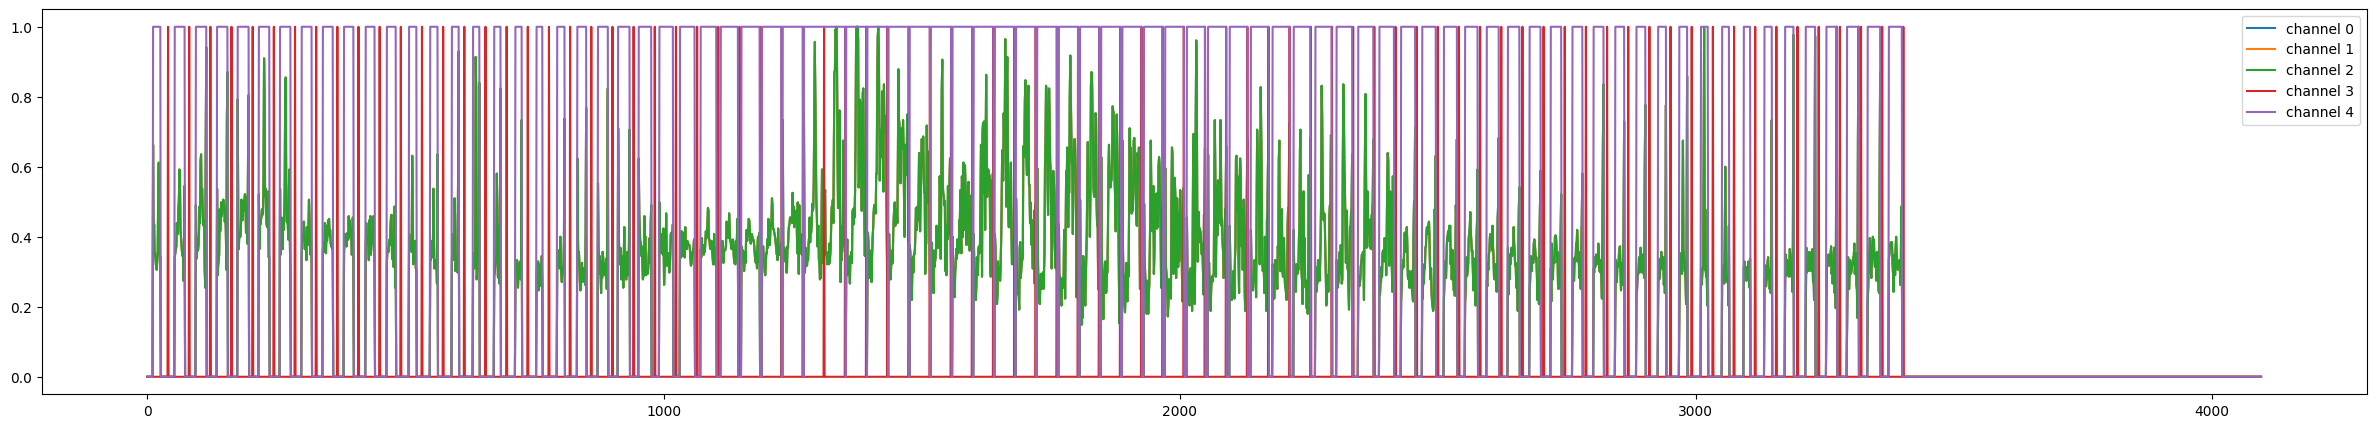

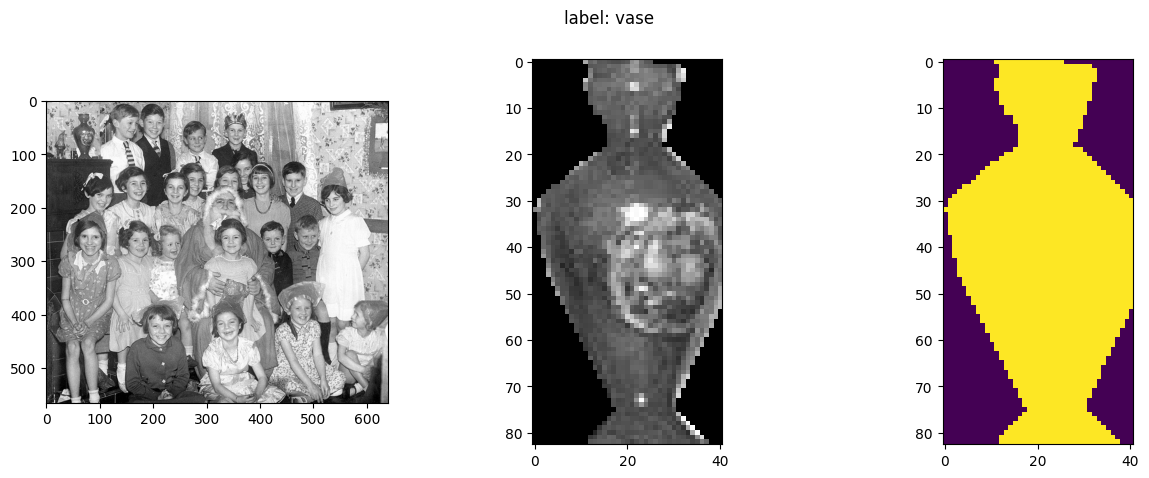

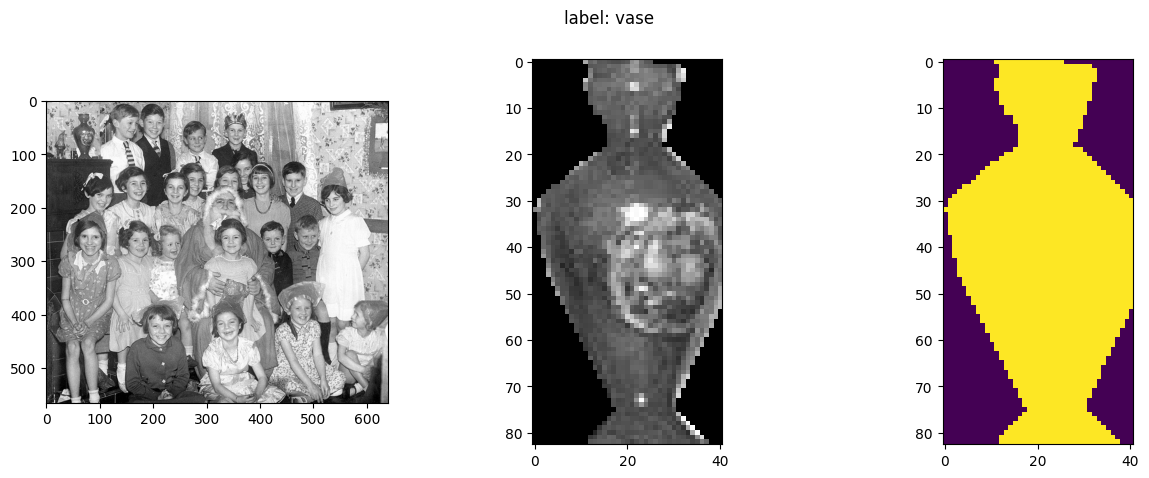

In [9]:

from PIL import Image
import matplotlib.pyplot as plt

from segment_dataset import COCOMaskDataset


dataset = COCOMaskDataset('/home/dchenbs/workspace/datasets/coco2017', 'val')

for i in range(1):
    sample = dataset[i]
    print(f"data_sequence: {sample['data_sequence'].shape}\n{sample['data_sequence']}")

    print(f'Max value of data_sequence: {sample["data_sequence"].max()}')
    print(f'Min value of data_sequence: {sample["data_sequence"].min()}')

    # plot each channel of data_sequence
    plt.figure(figsize=(30, 5))
    for channle in range(5):
        plt.plot(sample["data_sequence"][:,  channle], label=f"channel {channle}")
    plt.legend()
    plt.show()



    # visualize image, segment and mask
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(Image.open(sample['path']))
    axes[1].imshow(sample['segment'] * sample['mask'][:, :, None])
    axes[2].imshow(sample['mask'])
    plt.suptitle(f"label: {dataset.id_to_name[sample['label']]}")
    plt.show()

    
    # visualize image, segment and mask
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(Image.open(sample['path']))
    axes[1].imshow(sample['decoded_segment'] * sample['decoded_mask'][:, :, None])
    axes[2].imshow(sample['decoded_mask'])
    plt.suptitle(f"label: {dataset.id_to_name[sample['label']]}")
    plt.show()
